In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [11]:
# import dfs from each analysis

bert = pd.read_csv('df_with_sentiment.csv')
polarity = pd.read_csv('df_with_tags.csv')

In [12]:
bert.head()

,id,rating,text from review,sentiment score
0,kbwKxRdvWTu_Hy5sDN-JWQ,5,Came here yesterday with my wife. Food is amaz...,4
1,kbwKxRdvWTu_Hy5sDN-JWQ,2,This review is from when I tried the food last...,3
2,kbwKxRdvWTu_Hy5sDN-JWQ,5,One of my favorite spots for food in Westwood....,5
3,kbwKxRdvWTu_Hy5sDN-JWQ,3,I knew that since this place had self-order ki...,3
4,kbwKxRdvWTu_Hy5sDN-JWQ,5,Delicious and Fast Dim Sum! It was easy to ord...,5


In [13]:
polarity.groupby('rating')['polarity'].mean().reset_index()

,rating,polarity
0,1,-0.033088
1,2,0.090444
2,3,0.176034
3,4,0.259644
4,5,0.338835


In [14]:
# assign sentiment score based on avg polarity grouped by original rating

for index, row in polarity.iterrows():
    if polarity.loc[index, 'polarity'] <= -0.03:
        polarity.loc[index, 'sentiment score'] = 1
    elif polarity.loc[index, 'polarity'] < 0.07:
        polarity.loc[index, 'sentiment score'] = 2
    elif polarity.loc[index, 'polarity'] < 0.2:
        polarity.loc[index, 'sentiment score'] = 3
    elif polarity.loc[index, 'polarity'] < 0.4:
        polarity.loc[index, 'sentiment score'] = 4
    else:
        polarity.loc[index, 'sentiment score'] = 5


/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed 

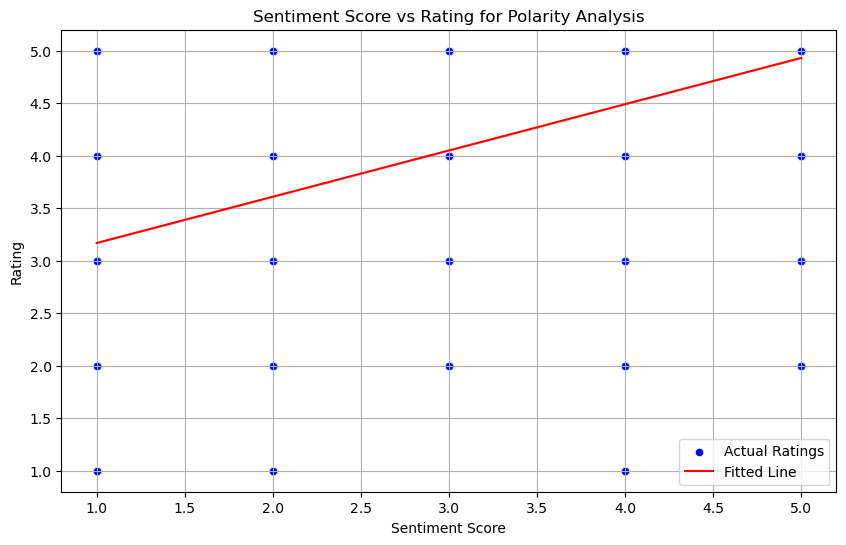

Mean Squared Error: 0.7243792791567156
R-squared: 0.1857102586090158


In [91]:
# plot polarity analysis

X = polarity[['sentiment score']]  # Feature
y = polarity['rating']           # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['sentiment score'], y=y_test, color='blue', label='Actual Ratings')
sns.lineplot(x=X_test['sentiment score'], y=y_pred, color='red', label='Fitted Line')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.title('Sentiment Score vs Rating for Polarity Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed 

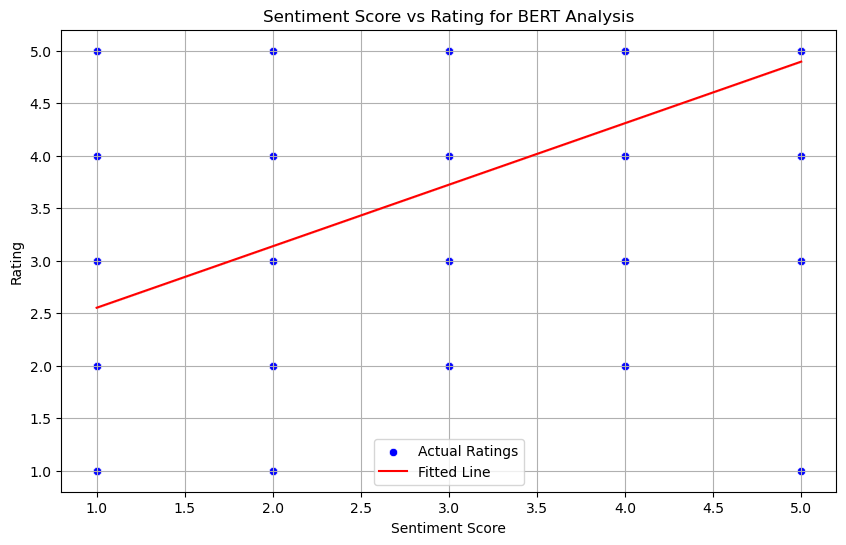

Mean Squared Error: 0.46669047958181037
R-squared: 0.4753835720277537


In [90]:
# plot polarity analysis

X = bert[['sentiment score']]  # Feature
y = bert['rating']           # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['sentiment score'], y=y_test, color='blue', label='Actual Ratings')
sns.lineplot(x=X_test['sentiment score'], y=y_pred, color='red', label='Fitted Line')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.title('Sentiment Score vs Rating for BERT Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


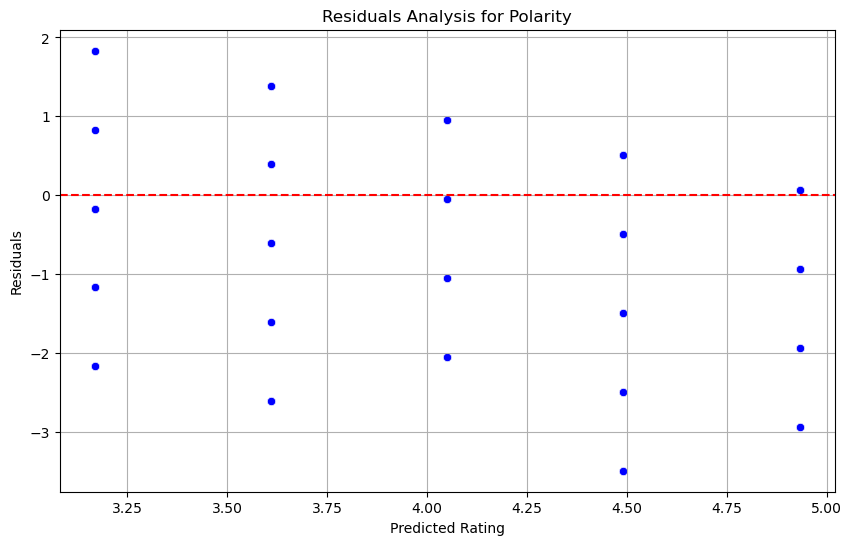

Mean Squared Error: 0.7243792791567156


In [92]:
# residuals analysis for polarity 

X = polarity[['sentiment score']]  # Feature
y = polarity['rating']             # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals')
plt.title('Residuals Analysis for Polarity')
plt.grid(True)
plt.show()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tessagervase/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


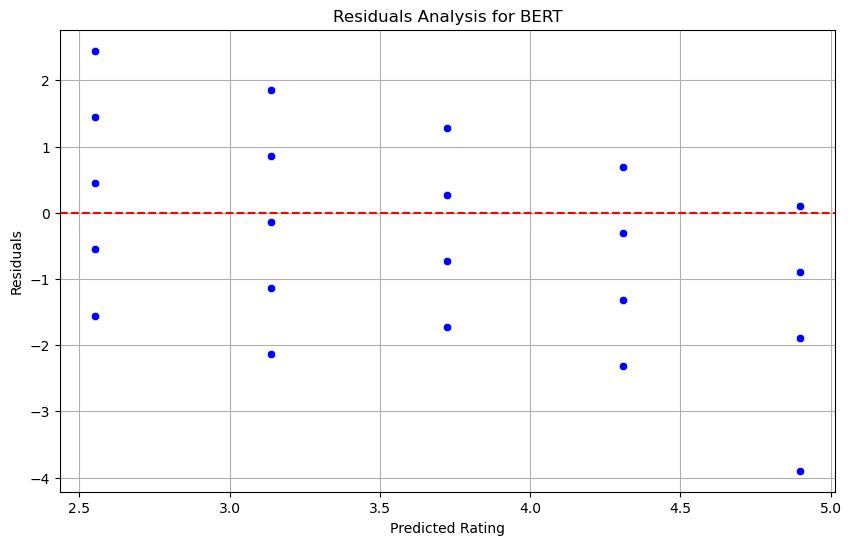

Mean Squared Error: 0.46669047958181037


In [81]:
# residuals analysis for BERT

X = bert[['sentiment score']]  # Feature
y = bert['rating']             # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals')
plt.title('Residuals Analysis for BERT')
plt.grid(True)
plt.show()


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

In [94]:
# Find most prominent topics in each review

## tokenize reviews
polarity['text from review'] = polarity.apply(lambda row: nltk.word_tokenize(row['text from review']), axis=1)

## make all lowercase
def to_lowercase(lst):
    return [s.lower() for s in lst]

polarity['text from review'] = polarity['text from review'].apply(to_lowercase)

## make list of tokenized lists
text_list = polarity['text from review'].tolist()

In [133]:
from collections import Counter

Counter(text_list[0])

Counter({'came': 1,
         'yesterday': 1,
         'wife': 1,
         'food': 2,
         'amazing': 1,
         'staff': 1,
         'friendly': 1,
         'quick': 1,
         'overall': 1,
         'pretty': 1,
         'decent': 1,
         'however': 1,
         'shrimp': 1,
         'wonton': 1,
         'chili': 1,
         'oil': 1,
         'pineapple': 1,
         'polo': 1,
         'bao': 1,
         'best': 2,
         'happy': 1,
         'i': 1,
         'discovered': 1,
         'place': 1})

In [139]:
import spacy


# Load pre-trained model
nlp = spacy.load('en_core_web_sm')

# Example review
review = "The sushi was amazing. My favorite was the spider roll, it was to die for."

# Process the review
doc = nlp(review)

# Extract named entities
entities = [(ent.text, ent.label_) for ent in doc.ents]
print(entities)

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [16]:
print(np.mean(polarity['sentiment score'], axis=0))

3.828406466512702
